<IPython.core.display.Javascript object>


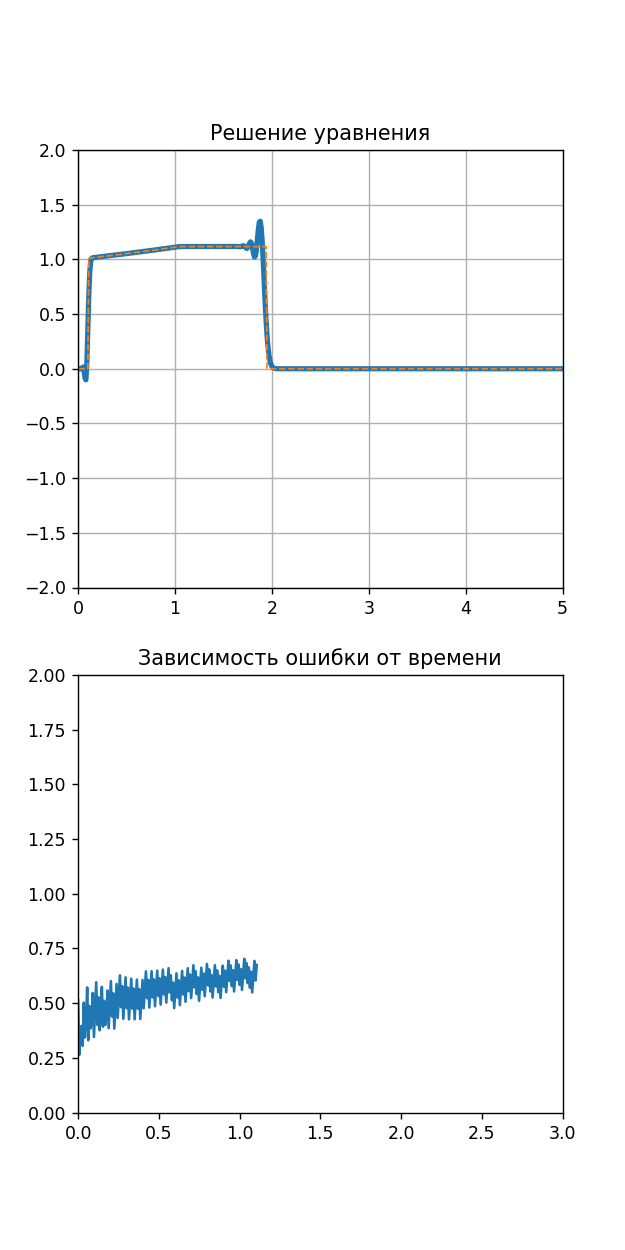

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

a = 1
h = 10 ** (-2)
l = 10
c = 0.7
x0 = 0
eps = 1
tau = c * h / a
t = np.arange(0, 5 + tau, tau)
x = np.arange(0, l + h, h)
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
ax[0].set_title("Решение уравнения")
ax[0].grid(True)
ax[1].set_title("Зависимость ошибки от времени")
ax[0].set_xlim(0, 5)
ax[0].set_ylim(-2, 2)
ax[1].set_xlim(0, 3)
ax[1].set_ylim(0, 2)
(line1,) = ax[0].plot([], [], lw=3)
(line2,) = ax[0].plot([], [], lw=1, linestyle="--")
(line3,) = ax[1].plot([], [])


def ksi(x):
    return np.abs(x - x0) / eps


def phi1(x):
    return np.heaviside(1 - ksi(x), 0)


def phi2(x):
    return phi1(x) * (1 - (ksi(x)), 2)


def phi3(x):
    return phi1(x) * (np.cos((np.pi / 2) * ksi(x))) ** 3


def mu(t):
    return phi1(t)


def real(x, t):
    return np.where(
        x < l * (1 - np.exp(-a * t / l)),
        l / (l - x) * mu(t + l / a * np.log(1 - x / l)),
        np.exp(a * t / l) * mu(l - (l - x) * np.exp(a * t / l)),
    )


def f(u, x):
    return a * (1 - x / l) * u


def velocity(u, x):
    return a * (1 - x / l)


def u_plus_half(u, x):
    return 0.5 * (u[1:-1] + u[2:]) - tau / (2 * h) * (
        f(u[2:], x[2:]) - f(u[1:-1], x[1:-1])
    )


def u_minus_half(u, x):
    return 0.5 * (u[:-2] + u[1:-1]) - tau / (2 * h) * (
        f(u[1:-1], x[1:-1]) - f(u[:-2], x[:-2])
    )


def flow_plus_half(u, x):
    return f(u_plus_half(u, x), x[1:-1] + h / 2)


def flow_minus_half(u, x):
    return f(u_minus_half(u, x), x[1:-1] - h / 2)


def solution(u_prev, x, t):
    u_next = np.zeros_like(u_prev)
    u_next[1:-1] = u_prev[1:-1] - (tau / h) * (
        flow_plus_half(u_prev, x) - flow_minus_half(u_prev, x)
    )
    u_next[0] = mu(t)
    u_next[-1] = u_prev[-1] - a * (tau / h) * (u_prev[-1] - u_prev[-2])
    return u_next


def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return (
        line1,
        line2,
        line3,
    )


u_prev = mu(x)
max_error = np.array([])


def update(i):
    global u_prev, max_error, x, t
    u_next = solution(u_prev, x, i)
    u_prev = np.copy(u_next)
    max_error = np.append(max_error, np.max(np.abs(u_prev - real(x, i))))
    line1.set_data(x, u_prev)
    line2.set_data(x, real(x, i))
    line3.set_data(t[: len(max_error)], max_error)
    return line1, line2, line3


anim = FuncAnimation(
    fig, update, init_func=init, frames=t, interval=1, blit=True, repeat=False
)

# ax[0].legend()
# ax[1].legend()

/tmp/ipykernel_3729/1678601837.py:51: RuntimeWarning: divide by zero encountered in divide
  l / (l - x) * mu(t + l / a * np.log(1 - x / l)),
/tmp/ipykernel_3729/1678601837.py:51: RuntimeWarning: divide by zero encountered in log
  l / (l - x) * mu(t + l / a * np.log(1 - x / l)),
/tmp/ipykernel_3729/1678601837.py:51: RuntimeWarning: invalid value encountered in multiply
  l / (l - x) * mu(t + l / a * np.log(1 - x / l)),


<IPython.core.display.Javascript object>


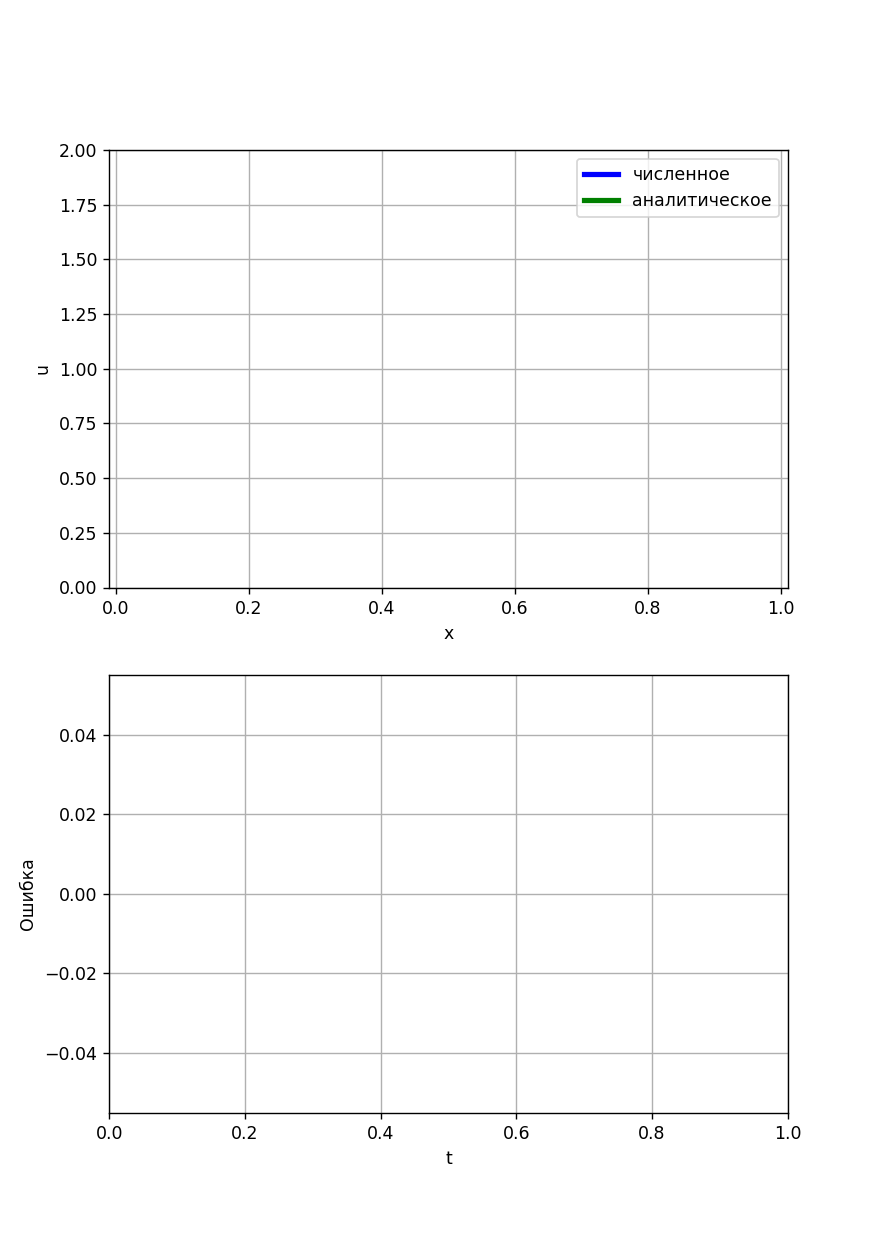

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x0 = 0
b = 1
h = (10)**(-2)
a = 1 / np.sqrt(2)
a_l = 1
b_l = 0
a_r = 1
b_r = -1
c = 0.7
tau = c * h / a
x = np.linspace(x0, b, int((b - x0) / h) + 1)
T = 1
t1 = np.linspace(0, T, int(T / tau) + 1)

f = lambda x, t: 1 + (2 * x**2 - t**2) * (1 + 2 * (np.tan(x * t))**2) / (4 * np.cos(x * t))
phi = lambda x: x**2 + 1 / 2
phi_der_2 = lambda x: 2
psi = lambda x: -2 * x
mu_l = lambda t: t**2 + 1 / 2
mu_r = lambda t: t**2 - 1 + (1 - t * np.tan(t)) / (2 * np.cos(t))
real = lambda x, t: (x - t)**2 + 1 / (2 * np.cos(x * t))

def u0():
    return phi(x)

def u1_first():
    return phi(x) + tau * psi(x)

def u1_second():
    return phi(x) + tau * psi(x) + (((tau)**2) / 2) * (a**2 * phi_der_2(x) + f(x, 0))

def gran1(u, t):
    left = (mu_l(t) + (b_l * u[1]) / h) / (a_l + b_l / h)
    right = (mu_r(t) + (b_r * u[-2]) / h) / (a_r + b_r / h)
    return (left, right)
    
def gran2(u, t):
    left = (mu_l(t) - 4 * b_l * u[1] / (2 * h) + b_l * u[2] / (2 *h)) / (a_l + 3 * b_l / (2 * h))
    right = (mu_r(t) + 4 * b_r * u[-2] / (2 * h) - b_r * u[-3] / (2 *h)) / (a_r + 3 * b_r / (2 * h))
    return (left, right)

u0x = u0()
u0x[0] = gran1(u0x, t1[0])[0]
u0x[-1] = gran1(u0x, t1[0])[1]
u1x = u1_second()          # поменять порядок аппроксимации
u1x[0] = gran1(u1x, t1[1])[0]
u1x[-1] = gran1(u1x, t1[1])[1]
def method(u0, u1, x, t):
    u[1:-1] = 2 * u1[1:-1] - u0[1:-1] + (tau * a / h) ** 2 * (u1[2:] - 2 * u1[1:-1] + u1[:-2]) + tau**2 * f(x[1:-1], t - tau)
    u[0] = gran1(u, t)[0]  # поменять порядок аппроксимации
    u[-1] = gran1(u, t)[1] # поменять порядок аппроксимации
    return u

fig, ax = plt.subplots(2, 1, figsize=(7, 10))
ax[0].grid(True)
ax[0].set_xlim(x0 - h, b + h)
ax[0].set_ylim(0, 2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('u')
ax[1].set_label('Погрешность')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Ошибка')
ax[1].set_xlim(0, 1)
ax[1].grid(True)
(line1,) = ax[0].plot([], [], lw=3, color='b', label='численное')
(line2,) = ax[0].plot([], [], lw=3, color='g', label='аналитическое')
(line3,) = ax[1].plot([], [], color='r')
ax[0].legend()

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return (line1, line2, line3)

r = np.array([])
def animate(i):
    global u0x, u1x, x, t1, r
    u_res = np.zeros_like(x)
    u_res = method(u0x, u1x, x, i)
    r = np.append(r, np.max(np.abs(real(x, i) - u_res)))
    u0x = np.copy(u1x)
    u1x = np.copy(u_res)
    line1.set_data(x, u1x)
    line2.set_data(x, real(x, i))
    line3.set_data(t1[:len(r)], r)
    return line1, line2, line3

anim = FuncAnimation(
    fig, animate, init_func=init, frames=t1, interval=1, blit=True, repeat=False
)
plt.show()